In [0]:
import requests
from bs4 import BeautifulSoup
from IPython.display import Image
import pandas as pd


In [2]:
url = "https://www.pagina12.com.ar"
p12 = requests.get(url)
print(p12.status_code)
print(p12.content)
print(p12.headers)

#El headers indica que tipo de User agent devuelve la pagina
#que esta haciendo la peticion
print(p12.request.headers)
print(p12.request.method)
#Verificamos que no haya redireccionamiento
print(p12.request.url)

200
b'<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>P\xc3\xa1gina12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer pol\xc3\xadtico de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="P\xc3\xa1gina12 | La otra mirada"><meta property="og:site_name" name="og:site_name" content="PAGINA12"><meta property="og:type" name="og:type" content="website"><meta property="og:url" name="og:url" content="https://www.pagina12.com.ar"><meta property="og:description" name="og:

In [3]:
# Pasamos la pagina a beautifulSoup
s = BeautifulSoup(p12.text, 'lxml')

type(s)

print(s.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   Página12 | La otra mirada
  </title>
  <meta content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg" name="google-site-verification"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}
  </script>
  <meta content="Notas focalizadas en el quehacer político de la Argentina." name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="Página12 | La otra mirada" name="og:title" property="og:title"/>
  <meta content="PAGINA12" name="og:site_name" property="og:site_name"/>
  <meta content="website" name="og:type" property="og:type"/>
  <meta content="https://www.pagina12.com.ar" name="og:url" property="og:url"/>
  <meta 

In [4]:
# Find encuentra el primer elemento que coincida
# con el parametro asignado
# Obtenemos los encabezados de la pagina
secciones = s.find('ul', attrs={'class' : 'hot-sections'}).find_all('li')
print(secciones)

[<li class=""><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>, <li class=""><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li>, <li class="no-border"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li>, <li class="show-for-large"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a></li>, <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li>, <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li>, <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/plastica">Plástica</a></li>, <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/contratapa">Contratapa</a></li>]


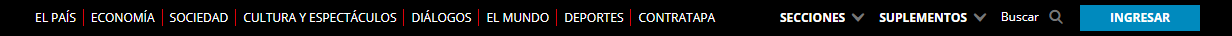

In [5]:
seccion = secciones[0]
print(seccion)

<li class=""><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>


In [6]:
# Obtenemos el link del a
# De cada encabezado obtenemos el link
seccion.find('a').get('href')

'https://www.pagina12.com.ar/secciones/el-pais'

In [7]:
# Obtenemos el texto del tag
seccion.find('a').get_text()

'El país'

In [8]:
# Obtenemos los href de las secciones
# De cada encabezado obtenemos el link
links_secciones = [seccion.a.get('href') for seccion in secciones]
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/plastica',
 'https://www.pagina12.com.ar/secciones/contratapa']

In [9]:
#Visitamos la pagina del primer lik
sec = requests.get(links_secciones[0])
sec.status_code

200

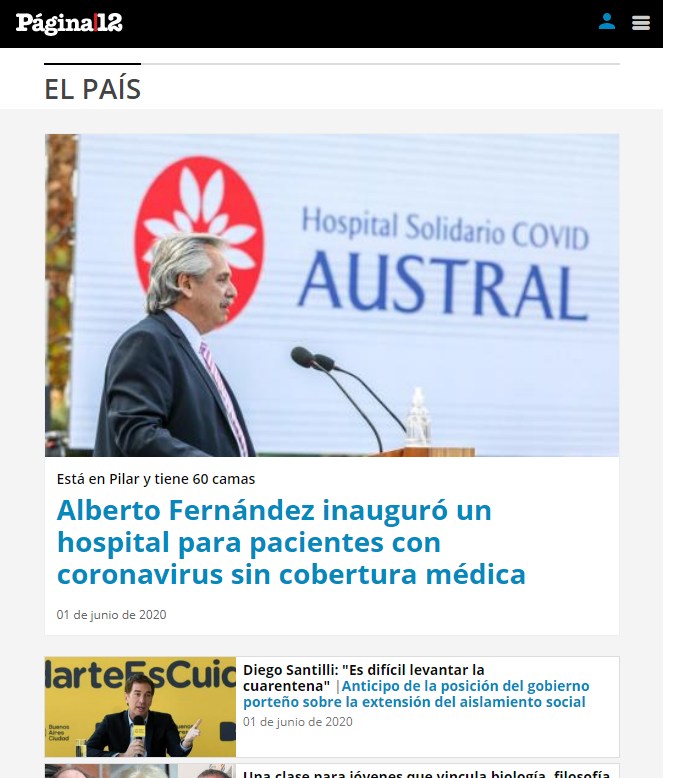

In [10]:
# Pasamos la pagina a un objeto de Beatifulsoup
s_seccion = BeautifulSoup(sec.text, 'lxml')
s_seccion

<!DOCTYPE html>
<html class="no-js"><head><meta charset="utf-8"/><title>El país | Página12</title><link href="https://www.pagina12.com.ar/secciones/el-pais" rel="canonical"/><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}</script><meta content="La puja política de coyuntura y la reflexión de prestigiosos columnistas sobre la actualidad.
" name="description" property="description"/><meta content="1541638399393436" name="fb:pages" property="fb:pages"/><meta content="es_AR" name="og:locale" property="og:locale"/><meta content="El país | Página12" name="og:title" property="og:title"/><meta content="PAGINA12" name="og:site_name" property="og:site_name"/><meta content="website" name="og:type" property="og:type"/><meta content="https://www.pagina12.com.ar/secciones/el-pais" name="og:url" property="og:url"/><meta content="La puja política de 

In [11]:
# Encontramos la seccion de los articulos
# con la clase y el elemento que los contiene
featured_article = s_seccion.find('div', attrs={'class': 'featured-article__container'})
featured_article


<div class="featured-article__container"><span class="title-prefix"><a href="https://www.pagina12.com.ar/269758-como-reservar-pasaje-en-tren-el-detalle-paso-a-paso">El lunes, prueba piloto en el Mitre</a></span><h2><a href="https://www.pagina12.com.ar/269758-como-reservar-pasaje-en-tren-el-detalle-paso-a-paso">Cómo reservar pasaje en tren, el detalle paso a paso</a></h2><a href="https://www.pagina12.com.ar/269758-como-reservar-pasaje-en-tren-el-detalle-paso-a-paso"><p class="subhead">Podrán hacerse con 3 días de anticipación y hasta para 5 días corridos. No aparecerán ofrecidas las formaciones llenas. El sistema se extenderá con el tiempo al Sarmiento y al Roca. El permiso de Tren...</p></a><div class="data-bar"><span class="date-1">02 de junio de 2020</span></div></div>

In [12]:
# Obtenemos la liga del primer articulo
featured_article.a.get('href')

'https://www.pagina12.com.ar/269758-como-reservar-pasaje-en-tren-el-detalle-paso-a-paso'

In [13]:
# Obtenemos la lista de los articulos
article_list = s_seccion.find('ul', attrs={'class': 'article-list'})
article_list

<ul class="article-list"><li></li><li><div class="article-box-sections article-box--white-box article-box--printed article-box--with-image article-box--not-using-section-label" data-order="100"><div class="first-col column small-8 xsmall-8"><div class="article-box__container"><h5 class="hide-for-xsmall-only hide-for-small-only"></h5><h2><a href="https://www.pagina12.com.ar/269753-rodolfo-galimberti-y-los-hilos-de-la-contraofensiva">Rodolfo Galimberti y los hilos de la contraofensiva<i>|</i><span>La historia del exsecretario de la Juventud Peronista y miembro de Montoneros </span></a></h2><div class="data-bar"><span class="date-1">02 de junio de 2020</span><i>|</i><span class="tag-1">Por <a href="https://www.pagina12.com.ar/autores/106426-gisela-marziotta">Gisela Marziotta</a></span></div></div></div><div class="second-col column small-4 xsmall-4 no-pad-left-sm"><div class="article-box__image-container"><a class="relative object-fit intrinsic-container intrinsic-container-16x9" href="ht

In [0]:
def obtener_notas(soup):
  # Funcion que recibe un objeto de tipo beautiful soup de una seccion
  # y devuelve las notas de la misma
  lista_notas = []
  
  # Obtener el articulo promocionado
  featured_article = soup.find('div', attrs={'class': 'featured-article__container'})
  #Tenemos que verificar de que el objeto existe, beautiful soup en caso de no
  # encontrar nada regresa un None
  if featured_article:
    lista_notas.append(featured_article.a.get('href'))

  # Vamos listando los items de la vista de articulos
  article_list = soup.find('ul', attrs={'class': 'article-list'})
  for article in article_list.find_all('li'):
    if article.a:
      lista_notas.append(article.a.get('href'))

  return lista_notas

In [37]:
lista_notas = obtener_notas(s_seccion)
lista_notas

['https://www.pagina12.com.ar/269758-como-reservar-pasaje-en-tren-el-detalle-paso-a-paso',
 'https://www.pagina12.com.ar/269753-rodolfo-galimberti-y-los-hilos-de-la-contraofensiva',
 'https://www.pagina12.com.ar/269751-coronavirus-clausuran-una-sede-del-consejo-de-la-magistratur',
 'https://www.pagina12.com.ar/269749-milagro-sala-sobre-los-anticuarentena-a-la-derecha-hagas-lo-',
 'https://www.pagina12.com.ar/269685-el-proyecto-de-ley-ramona-es-el-turno-de-que-el-estado-las-c',
 'https://www.pagina12.com.ar/269692-congreso-los-temas-algidos-que-quedan-por-delante',
 'https://www.pagina12.com.ar/269694-cuarentena-si-no-suben-los-casos-habilitaran-nuevos-rubros-y',
 'https://www.pagina12.com.ar/269695-un-convenio-para-mejorar-las-carceles',
 'https://www.pagina12.com.ar/269535-el-banco-nacional-de-datos-geneticos-cumple-33-anos',
 'https://www.pagina12.com.ar/269541-una-clase-para-jovenes-que-vincula-biologia-filosofia-y-dere',
 'https://www.pagina12.com.ar/269578-la-causa-verdura-una-inv

In [16]:
# Manejo de erores
r = requests.get(url)
# Estatus 200 es que nos regrso la pagina correctamente
if r.status_code == 200:
  # Procesar respuesta
  js = 12
else:
  #Procesar error
  j = 1

url_mala = "https://www.pagina14.com.ar"

try:
  requests.get(url_mala)
except Exception as e:
  print('Error en URL')
  print(e)


try:
  featured_article.b.get('href')
except:
  pass
  print('Continua el codigo')


Error en URL
HTTPSConnectionPool(host='www.pagina14.com.ar', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f6fa504c748>: Failed to establish a new connection: [Errno -2] Name or service not known',))
Continua el codigo


In [17]:
url_nota = lista_notas[0]
url_nota

'https://www.pagina12.com.ar/269758-como-reservar-pasaje-en-tren-el-detalle-paso-a-paso'

In [18]:
try:
  nota = requests.get(url_nota)
  if nota.status_code == 200:
    s_nota = BeautifulSoup(nota.text, 'lxml')

    #Extraemos el titulo
    titulo = s_nota.find('h1', attrs={'class': 'article-title'})
    print(titulo.text)

    # Extraemos la fecha
    fecha = s_nota.find('span', attrs={'pubdate': 'pubdate'}).get('datetime')
    print(fecha)

    #Extraemos la volanta
    volanta = s_nota.find('h2', attrs={'class': 'article-prefix'})
    print(volanta.text)

    #Extraemos el copete
    copete = s_nota.find('div', attrs={'class': 'article-summary'})
    print(copete.text)

    # Extraemos el auto
    autor = s_nota.find('div', attrs={'class': 'article-author'})
    print(autor.a.text)

    # Extraemos el contenido del articulo
    contenido = s_nota.find('div', attrs={'class': 'article-text'})
    print(contenido.text)

except Exception as e:
  print('Error')
  print(e)
  print('\n')

Cómo reservar pasaje en tren, el detalle paso a paso
2020-06-02
El lunes, prueba piloto en el Mitre
Podrán hacerse con 3 días de anticipación y hasta para 5 días corridos. No aparecerán ofrecidas las formaciones llenas. El sistema se extenderá con el tiempo al Sarmiento y al Roca. El permiso de Trenes Argentinos no reemplaza el de circulación.
Gustavo Sala
Para evitar los amontonamientos en los trenes en tiempos en que la cuarentena por coronavirus impone el distanciamiento social, el Gobierno implementó un sistema de reserva de lugares que comenzará a ser utilizado a partir del lunes en la línea Mitre. Cómo descargar la appPara viajar, los pasajeros deberán obtener un asiento a través de una app, que puede descargarse de la página web de Trenes Argentinos, o llamando a un  call center. Las reservas se pueden pedir con tres días de anticipación y por cinco días corridos. Por ahora, el sistema rige en los servicios de entre las 6 y las 10 de la mañana.
 



De qué modo se reservaEl usua

In [19]:
# Obtenemos la seccion en la que se encuentra la imagen
media = s_nota.find('div', attrs={'class': 'article-main-media-image'})
# De esa seccion obtenemos todas las imagenes
imagenes = media.find_all('img')
imagenes

[<img alt="Para evitar los amontonamientos en los trenes, el Gobierno implementó un sistema de reserva de lugares, que comenzará a ser utilizado a partir del lunes en la línea Mitre. " class="lazyload show-for-xsmall-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/media/articles/77717/trencartasso.jpeg?itok=mc9w7hTc" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img alt="Para evitar los amontonamientos en los trenes, el Gobierno implementó un sistema de reserva de lugares, que comenzará a ser utilizado a partir del lunes en la línea Mitre. " class="lazyload show-for-small-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/77717/trencartasso.jpeg?itok=Qsbij0Wj" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img alt="Para evitar los amontonamientos en los trenes, el Gobierno implementó un sistema de reserva de lugares, que comenzará a ser utilizado a partir d

In [20]:
if len(imagenes) == 0:
  print('No hay imagenes')
else:
  # Extraemos la ultima imagen que seria la mas grande
  imagen = imagenes[-1]
  img_src = imagen.get('data-src')
  print(img_src)

https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/77717/trencartasso.jpeg?itok=Qsbij0Wj


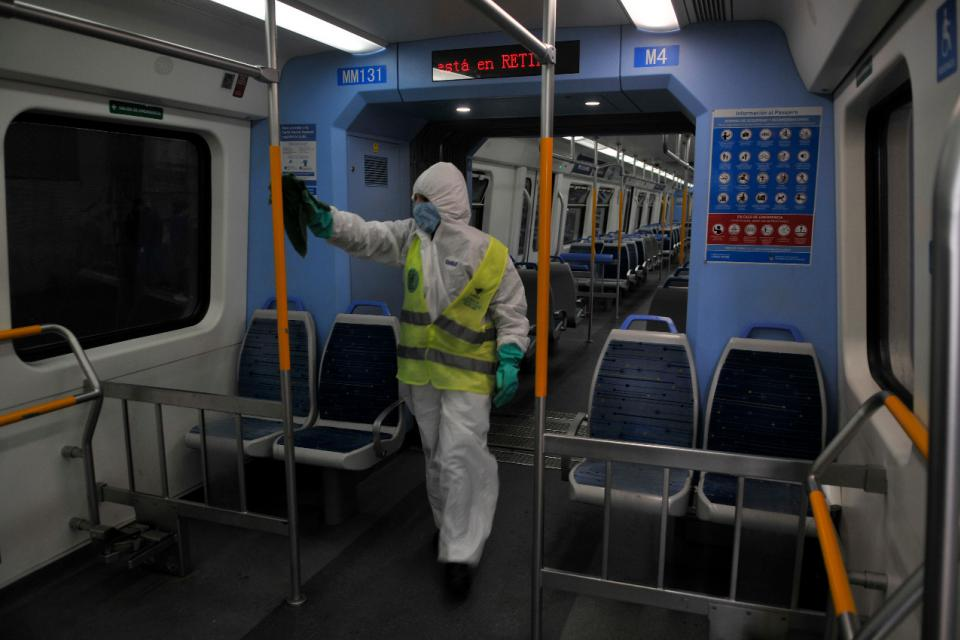

In [21]:
# Hacemos peticion a la imagen
img_req = requests.get(img_src)

# Imprimimos la imagen
Image(img_req.content)


In [0]:
def obtener_multimedia(s_nota):
  try:
    # Obtenemos la seccion en la que se encuentra la imagen
    media = s_nota.find('div', attrs={'class': 'article-main-media-image'})
    # De esa seccion obtenemos todas las imagenes
    imagenes = media.find_all('img')
    if len(imagenes) == 0:
      print('No hay imagenes')
      return None
    else:
      # Extraemos la ultima imagen que seria la mas grande
      imagen = imagenes[-1]
      img_src = imagen.get('data-src')
      return img_src
  except Exception as e:
    print('Error al obtener multimedia')
    print(e)
    return None


In [0]:
# Funcion para obtener informacion de la nota
def obtener_info(s_nota):
  # Recibimos un objeto de tipo Beautiful soup

  informacion_nota = {}
  try:
    #Extraemos el titulo
    informacion_nota['titulo'] = s_nota.find('h1', attrs={'class': 'article-title'}).text

    # Extraemos la fecha
    informacion_nota['fecha'] = s_nota.find('span', attrs={'pubdate': 'pubdate'}).get('datetime')
    
    #Extraemos la volanta
    informacion_nota['volanta'] = s_nota.find('h2', attrs={'class': 'article-prefix'}).text
    
    #Extraemos el copete
    informacion_nota['copete'] = s_nota.find('div', attrs={'class': 'article-summary'}).text
    
    # Extraemos el auto
    informacion_nota['autor'] = s_nota.find('div', attrs={'class': 'article-author'}).text

    # Extraemos el contenido del articulo
    informacion_nota['contenido'] = s_nota.find('div', attrs={'class': 'article-text'}).text
    
    # Extraemos la imagen 
    informacion_nota['imagen'] = obtener_multimedia(s_nota)

    return informacion_nota
  except Exception as e:
    print('Error al obtener la informacion')
    print(e)
    return None

In [0]:
def scrape_nota(url):
  try:
    nota = requests.get(url)
  except Exception as e:
    print('Error scrapeando URL', url)
    print(e)
    return None

  if nota.status_code != 200:
    print(f'Error obteniendo {url}')
    print(f'Codigo de error {notas.status_code}')
    return None

  s_nota = BeautifulSoup(nota.text, 'lxml')

  ret_dict = obtener_info(s_nota)
  ret_dict['url'] = url

  return ret_dict

In [41]:
# Obtenemos las notas de cada una de las secciones
print(links_secciones)
notas = []
for link in links_secciones:
  try:
    r = requests.get(link)
    if r.status_code == 200:
      soup = BeautifulSoup(r.text, 'lxml')
      notas.extend(obtener_notas(soup))
    else:
      print('No se pudo obtener la seccion')
  except:
    print('No se pudo obtener la seccion')

['https://www.pagina12.com.ar/secciones/el-pais', 'https://www.pagina12.com.ar/secciones/economia', 'https://www.pagina12.com.ar/secciones/sociedad', 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos', 'https://www.pagina12.com.ar/secciones/el-mundo', 'https://www.pagina12.com.ar/secciones/deportes', 'https://www.pagina12.com.ar/secciones/plastica', 'https://www.pagina12.com.ar/secciones/contratapa']


In [40]:
#Mostramos las notas obtenidas de todas las secciones
notas

['https://www.pagina12.com.ar/269767-ricardo-rouvier-dictara-el-curso-virtual-opinion-publica-y-c',
 'https://www.pagina12.com.ar/269758-como-reservar-pasaje-en-tren-el-detalle-paso-a-paso',
 'https://www.pagina12.com.ar/269753-rodolfo-galimberti-y-los-hilos-de-la-contraofensiva',
 'https://www.pagina12.com.ar/269751-coronavirus-clausuran-una-sede-del-consejo-de-la-magistratur',
 'https://www.pagina12.com.ar/269749-milagro-sala-sobre-los-anticuarentena-a-la-derecha-hagas-lo-',
 'https://www.pagina12.com.ar/269685-el-proyecto-de-ley-ramona-es-el-turno-de-que-el-estado-las-c',
 'https://www.pagina12.com.ar/269692-congreso-los-temas-algidos-que-quedan-por-delante',
 'https://www.pagina12.com.ar/269694-cuarentena-si-no-suben-los-casos-habilitaran-nuevos-rubros-y',
 'https://www.pagina12.com.ar/269695-un-convenio-para-mejorar-las-carceles',
 'https://www.pagina12.com.ar/269535-el-banco-nacional-de-datos-geneticos-cumple-33-anos',
 'https://www.pagina12.com.ar/269541-una-clase-para-jovenes-q

In [44]:
data = []

for i, nota in enumerate(notas):
  print(f'Screpeando a nota {i}/{len(notas)}')
  try:
    data.append(scrape_nota(nota))
  except:
    print('Error al scrapear', nota)

Screpeando a nota 0/106
Screpeando a nota 1/106
Screpeando a nota 2/106
Screpeando a nota 3/106
Screpeando a nota 4/106
Screpeando a nota 5/106
Error al obtener la informacion
'NoneType' object has no attribute 'text'
Error al scrapear https://www.pagina12.com.ar/269685-el-proyecto-de-ley-ramona-es-el-turno-de-que-el-estado-las-c
Screpeando a nota 6/106
Screpeando a nota 7/106
Screpeando a nota 8/106
Error al obtener la informacion
'NoneType' object has no attribute 'text'
Error al scrapear https://www.pagina12.com.ar/269695-un-convenio-para-mejorar-las-carceles
Screpeando a nota 9/106
Screpeando a nota 10/106
Screpeando a nota 11/106
Screpeando a nota 12/106
Screpeando a nota 13/106
Screpeando a nota 14/106
Screpeando a nota 15/106
Error al obtener la informacion
'NoneType' object has no attribute 'text'
Error al scrapear https://www.pagina12.com.ar/269068-asignacion-universal-por-embarazo-junio-2020-la-anses-fijo-l
Screpeando a nota 16/106
Error al obtener la informacion
'NoneType' o

In [0]:
df = pd.DataFrame(data)

In [48]:
df.head()

,titulo,fecha,volanta,copete,autor,contenido,imagen,url
0,"Ricardo Rouvier dictará el curso virtual ""Opin...",2020-06-02,Empieza el 4 de junio,"La capacitación está dirigida a políticos, pro...",Por Gustavo Sala,El sociólogo y analista político Ricardo Rouvi...,https://images.pagina12.com.ar/styles/focal_3_...,https://www.pagina12.com.ar/269767-ricardo-rou...
1,"Cómo reservar pasaje en tren, el detalle paso ...",2020-06-02,"El lunes, prueba piloto en el Mitre",Podrán hacerse con 3 días de anticipación y ha...,Por Gustavo Sala,Para evitar los amontonamientos en los trenes ...,https://images.pagina12.com.ar/styles/focal_3_...,https://www.pagina12.com.ar/269758-como-reserv...
2,Rodolfo Galimberti y los hilos de la contraofe...,2020-06-02,La historia del exsecretario de la Juventud Pe...,Página/12 avanza en el repaso de la vida de qu...,Por Gisela Marziotta,El 24 de marzo de 1976 los militares cerraron ...,https://images.pagina12.com.ar/styles/focal_3_...,https://www.pagina12.com.ar/269753-rodolfo-gal...
3,Coronavirus: clausuran una sede del Consejo de...,2020-06-02,Tuvo contacto con 10 trabajadores,La mujer se desempeña en el área de compras de...,Por Gustavo Sala,La sede de la Administración General del Conse...,https://images.pagina12.com.ar/styles/focal_3_...,https://www.pagina12.com.ar/269751-coronavirus...
4,"Milagro Sala sobre los anticuarentena: ""A la d...",2020-06-02,La líder de la Tupac Amaru habla a 1600 días d...,La dirigente recibió suero anoche porque se pu...,Por Gustavo Sala,Anoche le tuvieron que poner suero. La líder d...,https://images.pagina12.com.ar/styles/focal_3_...,https://www.pagina12.com.ar/269749-milagro-sal...


In [0]:
df.to_csv('Notas Pagina12.csv')